# KNN Regression and Linear Regression - Boston housing

In [76]:
loc = '../../_Datasets/housing.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
sns.set_style('darkgrid')

boston_original = pd.read_csv(loc)
boston = boston_original.copy()
boston.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [77]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


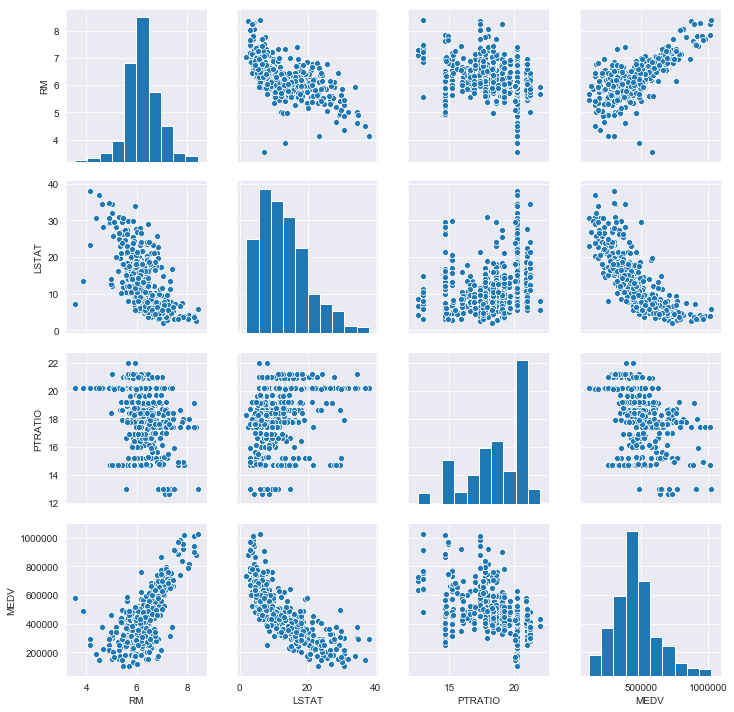

In [78]:
sns.pairplot(boston)

#### Notes: Pairplot

This gives us histograms of each feature, and very importantly - it provides a snapshot the relationships between features and our outcome: MEDV. Some distributions do not look linear, and we will need to try and address this.

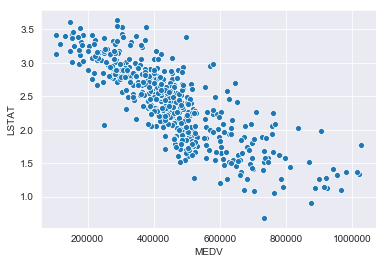

In [79]:
sns.scatterplot(boston.MEDV, np.log(boston.LSTAT))

#### Notes: Feature with log()

This turns our LSTAT feature into something more linear - let's keep it.

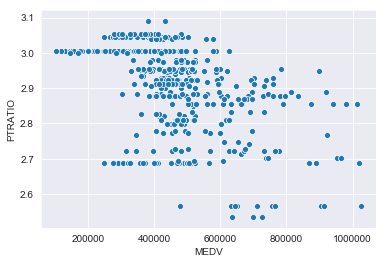

In [80]:
sns.scatterplot(boston.MEDV, np.log(boston.PTRATIO))

#### Notes: PTRATIO

This isn't playing nicely with transformation. I won't transform it for the model.

In [81]:
boston['LSTAT_tran'] = np.log(boston.LSTAT)
boston.drop(columns='LSTAT', inplace=True)
X = boston.drop(columns='MEDV')
y = boston.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lin_r = LinearRegression()
KNNr = KNeighborsRegressor(n_neighbors=10)

In [82]:
cross_val_score(lin_r, X, y, cv=KFold(5, shuffle=True, random_state=42))

array([0.73917503, 0.76783948, 0.69960626, 0.77481518, 0.7411514 ])

In [83]:
cross_val_score(KNNr, X, y, cv=KFold(5, shuffle=True, random_state=42)) 

array([0.80164489, 0.78412606, 0.73678501, 0.80724302, 0.85663389])

#### Notes: Scores

When using the cross validation score trick, we can see that the nearest neighbors model overall does a better job of fitting the data. Each score is strong in KNN when put against linear regression.

In [84]:
pred_linr = lin_r.fit(X_train, y_train).predict(X_test)
pred_KNNr = KNNr.fit(X_train, y_train).predict(X_test)

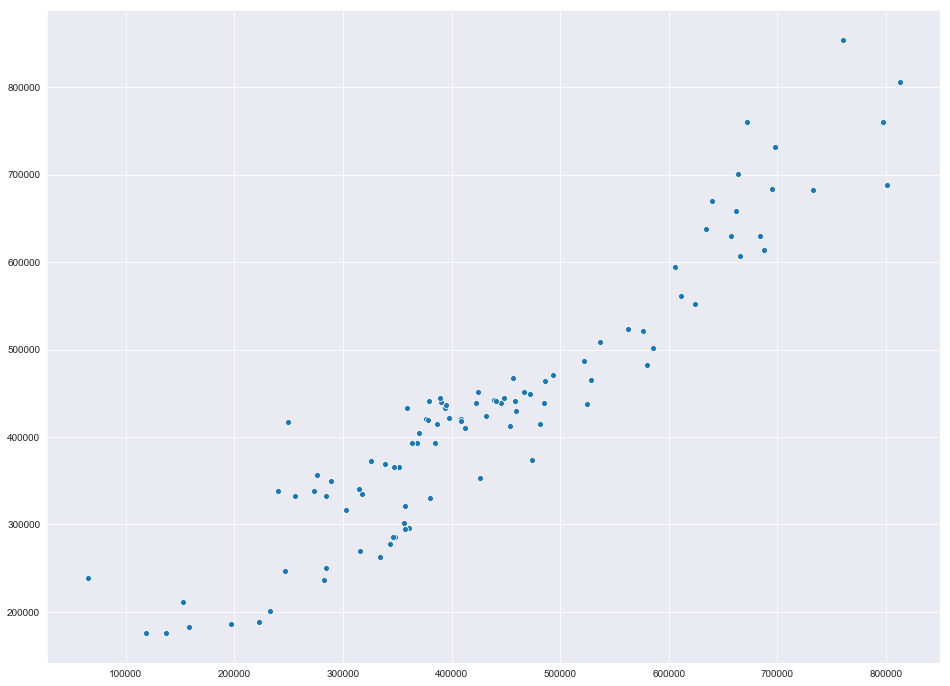

In [85]:
fig, ax = plt.subplots(figsize=(16,12))
sns.scatterplot(pred_linr, pred_KNNr, ax=ax)
# Best ways to label this? What about a y = x line?

#### Notes: Scatterplot of predictions

Above we have a scatterplot of prediction values from each model. Without the actual y values, we do not know exactly where they should lie, but this gives us a good idea about how they sit in relation to each other.

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


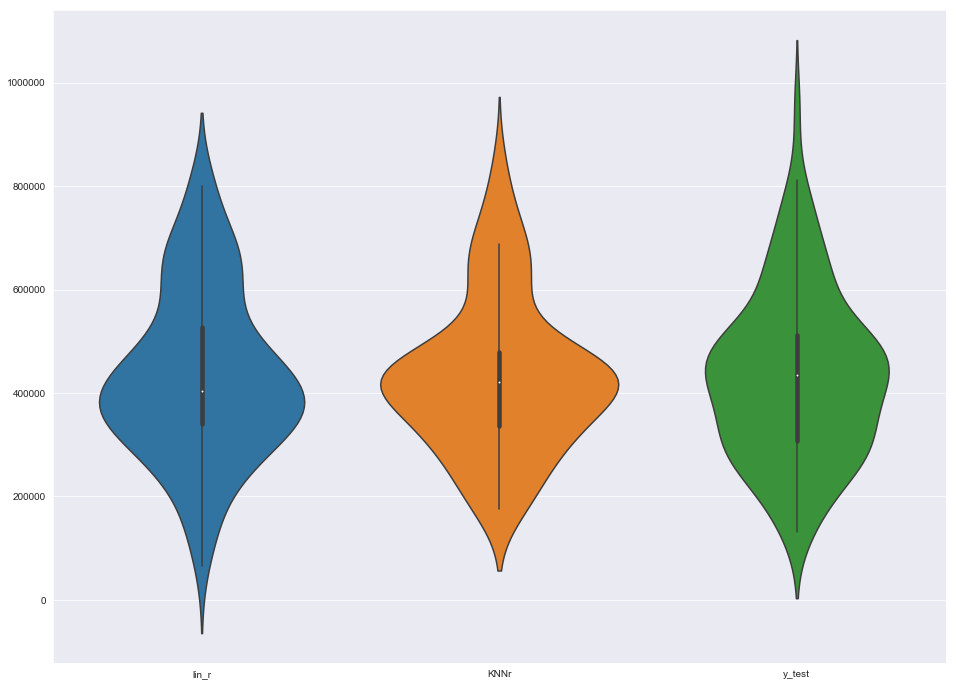

In [86]:
pred_and_ytest = {'lin_r':pred_linr, 'KNNr':pred_KNNr, 'y_test':y_test}
fig, ax = plt.subplots(figsize=(16,12))
sns.violinplot(data=pd.DataFrame(pred_and_ytest), ax=ax)

#### Notes: Distributions

Above we have value distributions for the two models and the actual values. 

The KNN Regression offers a more similar distribution of values, more noticeably at the peaks and the top. As we might expect, the linear regression predictions are smoother, without strong drops or rises.

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


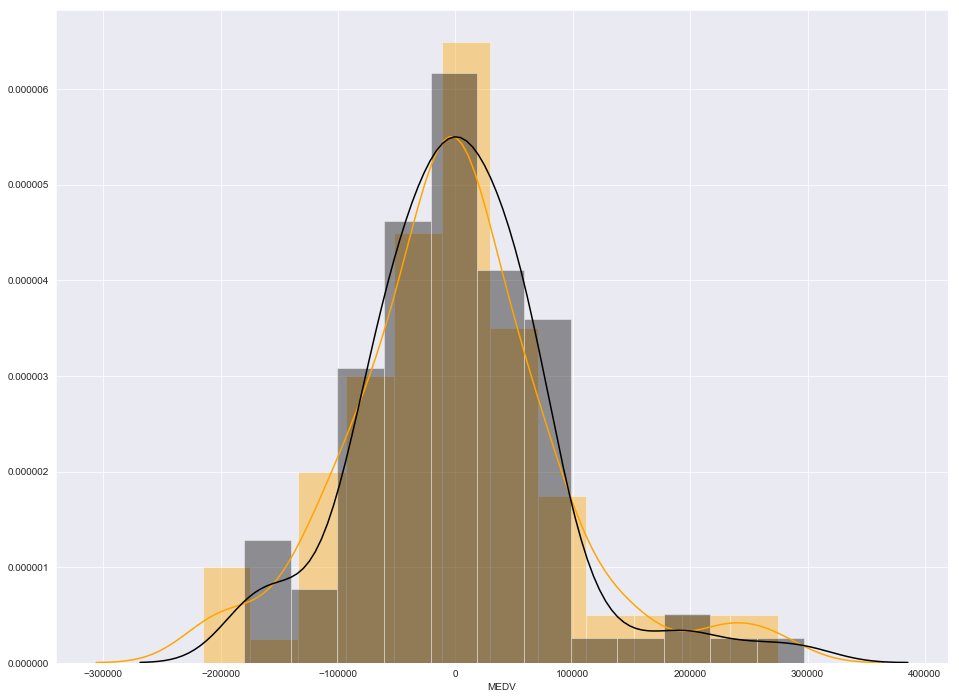

In [87]:
fig, ax = plt.subplots(figsize=(16,12))
sns.distplot(y_test - pred_linr, ax=ax, color='orange')
sns.distplot(y_test - pred_KNNr, ax=ax, color='black')

#### Notes: Residual distributions

With these two models' residual distributions, we can see that KNN regression is pulling off a better normal distribution.

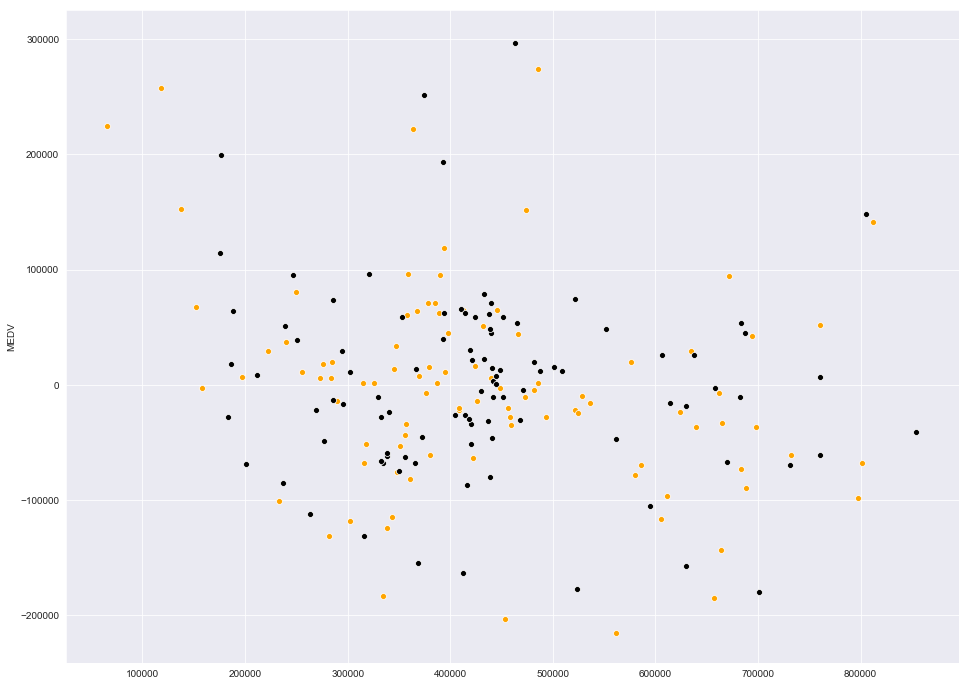

In [88]:
fig, ax = plt.subplots(figsize=(16,12))
sns.scatterplot(pred_linr, y_test - pred_linr, ax=ax, color='orange') 
sns.scatterplot(pred_KNNr, y_test - pred_KNNr, ax=ax, color='black')
# Needs a legend. Figure out how to add a moving average with color codes.
# Is there a way to visually connect corresponding predictions?

#### Notes: Homoscedasticity of models

Here we can see that neither of the models are doing an excellent job of fitting the model - the predictions versus the residuals are not evenly distributed. Orange points are from linear regression, and black points are from KNN regression.

Except for a handful black point outliers in the positive region, we can see that the KNN model is doing a better job of balancing out and fulfilling the homoscedasticity checkpoint. It might be more robust to the non-linear relationship of the PTRATIO feature.

In [89]:
display((y_test - pred_linr).describe())
display((y_test - pred_KNNr).describe())

count        98.000000
mean      -1439.340687
std       89166.023829
min     -215473.704178
25%      -52630.492587
50%       -2986.781248
75%       43624.402406
max      274499.634111
Name: MEDV, dtype: float64

count        98.000000
mean        925.714286
std       80739.851885
min     -179970.000000
25%      -46672.500000
50%        -945.000000
75%       47565.000000
max      296730.000000
Name: MEDV, dtype: float64

## Model comparison

#### Subtle differences

There are not major differences between the models, but given some of the assumptions and statistical figures we can measure, it appears KNN regression performs better given the data.

At this point, it is not clear what causes this. My guess is that the PTRATIO relationship does *not* fit the assumptions of linear regression, and negatively impacts this model. *With this, I would guess KNN regression performs better when linear relationships are too difficult to establish.* 